In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
dataset = pd.read_csv('input/P39-Minimizing-Churn-Data/churn_data.csv')

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


<pre>
 Description of each Columns
userid - MongoDB userid
churn  - Active = No | Suspended < 30 = No Else Churn = Yes
age - age of the customer
city - city of the customer
state- state where the customer lives
postal_code - zip code of the customer
zodiac_sign- zodiac sign of the customer
rent_or_own - Does the customer rents or owns a house 
more_than_one_mobile_device - does the customer use more than one mobile device
payFreq- Pay Frequency of the cusomter
in_collections - is the customer in collections
loan_pending - is the loan pending
withdrawn_application - has the customer withdrawn the loan applicaiton 
paid_off_loan- has the customer paid of the loan
did_not_accept_funding - customer did not accept funding
cash_back_engagement - Sum of cash back dollars received by a customer / No of days in the app
cash_back_amount - Sum of cash back dollars received by a customer
used_ios- Has the user used an iphone
used_android - Has the user used a android based phone
has_used_mobile_and_web - Has the user used mobile and web platforms
has_used_web - Has the user used MoneyLion Web app
has_used_mobile - as the user used MoneyLion  app
has_reffered- Has the user referred
cards_clicked - How many times a user has clicked the cards
cards_not_helpful- How helpful was the cards
cards_helpful- How helpful was the cards
cards_viewed- How many times a user viewed the cards
cards_share- How many times a user shared his cards
trivia_view_results-How many times a user viewed trivia results
trivia_view_unlocked- How many times a user viewed trivia view unlocked screen
trivia_view_locked - How many times a user viewed trivia view locked screen
trivia_shared_results- How many times a user shared trivia results 
trivia_played - How many times a user played trivia 
re_linked_account- Has the user re linked account
un_linked_account - Has the user un linked account
credit_score - Customer's credit score
</pre>

In [6]:
# Nan 제거
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [7]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
dataset = dataset[pd.notnull(dataset['age'])]

In [10]:
# null 값이 많은 두 columns 제거
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [11]:
# 히스토그램
dataset2 = dataset.drop(columns = ['user', 'churn'])

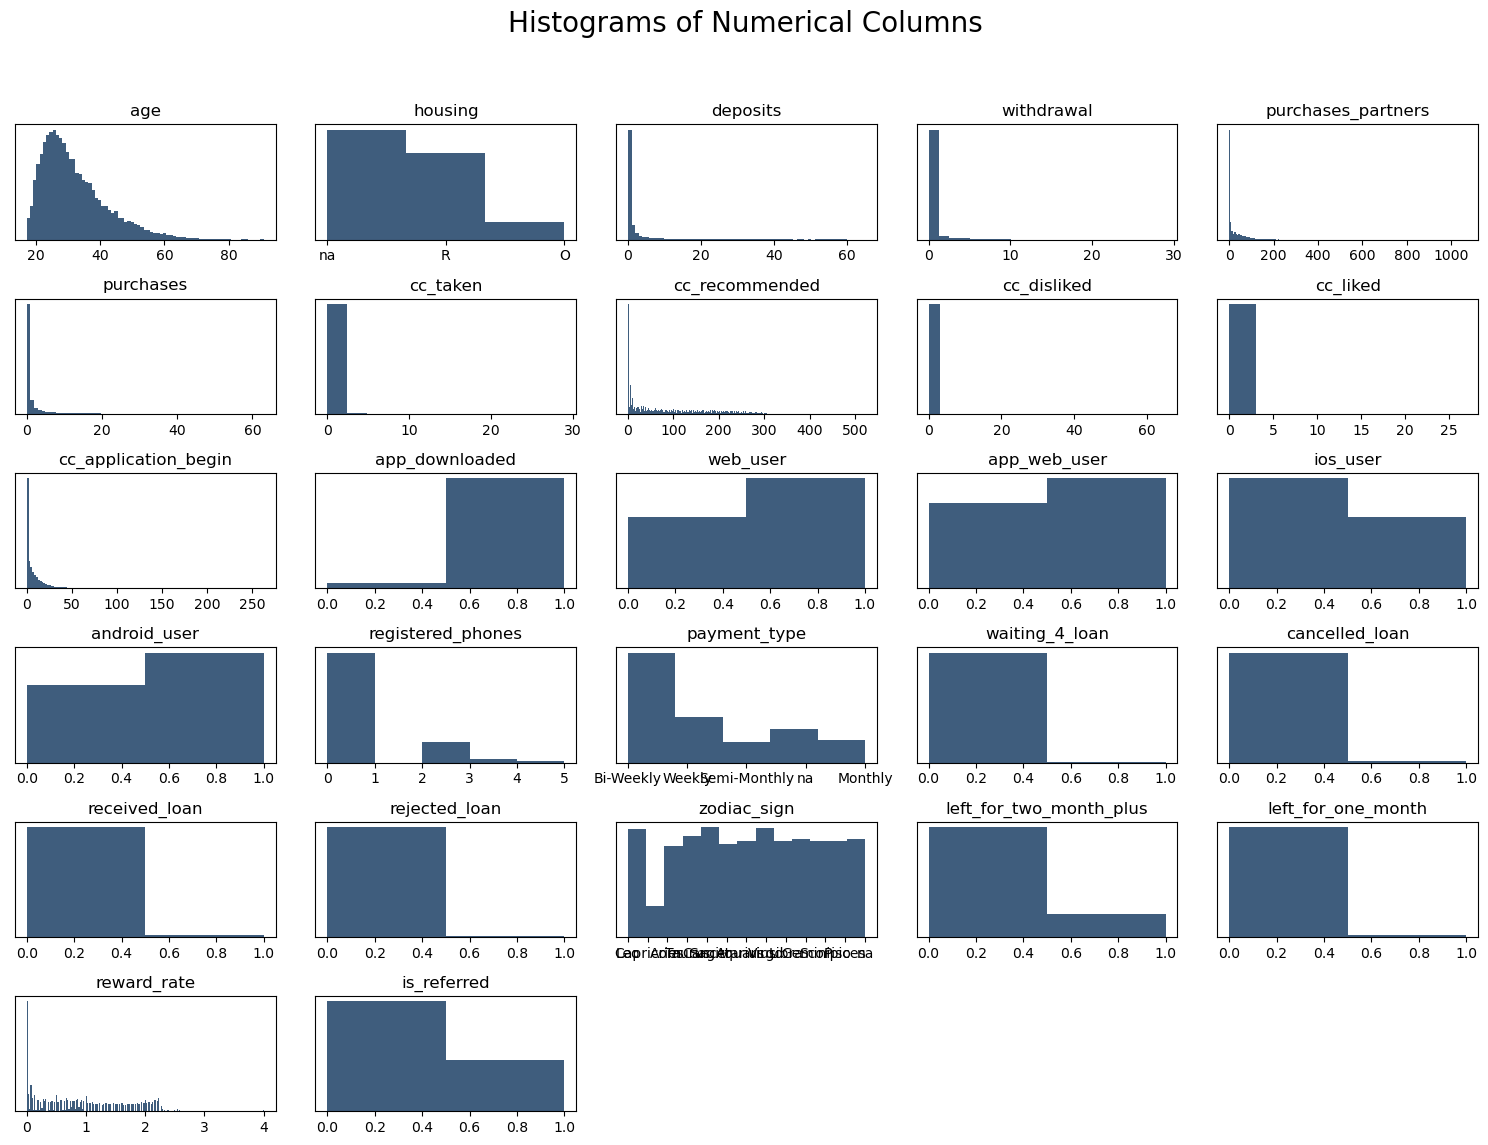

In [14]:
# matplot에서 figure 객체(틀), ax 객체(캔버스) 라고 생각하라
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize =20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i) 
    f = plt.gca()        # Get current axes instance
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    
    vals = np.size(dataset2.iloc[:, i - 1].unique()) # 전체열 쿼리후 unique로 모든 고유값 가져옴
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Binary column 이 극단적인 값을 가지면 극단적인 결과를 불러 올 수 있다.
다른 열의 값과 관계없이 결과를 대표할 수도 있기 때문임

In [15]:
# 파이차트 구성
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

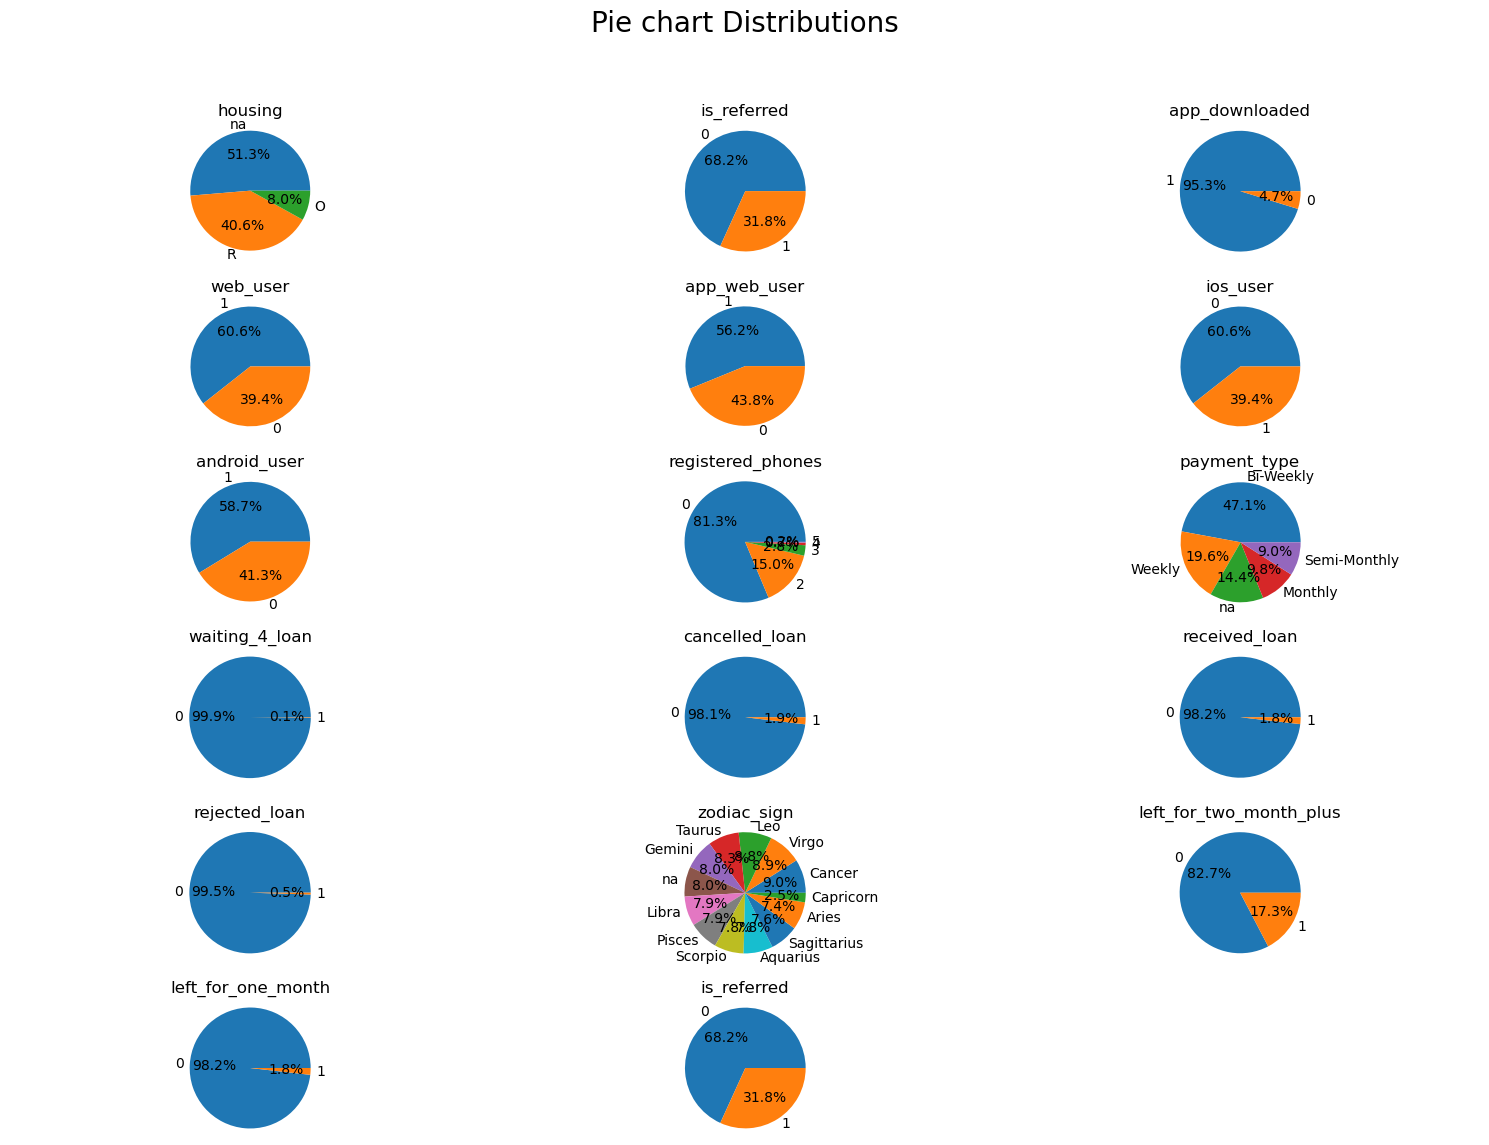

In [18]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie chart Distributions', fontsize =20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i) 
    f = plt.gca()        # Get current axes instance
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    
    plt.pie(values, labels = index, autopct ='%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

waiting_4_loan 의 0.1 크기의 subset이 모델 생성시 유용한가? 

In [20]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

27:8 으로 편향된 결과를 갖지는 않았다.

In [21]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [23]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [24]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [25]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

모든 작은 하위 세트가 반응변수를 균등하게 갖는 분포를 보인다.
따라서 모두 모델 생성시 사용 가능하다